In [413]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split


In [414]:
# sigmoid "logistic" function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [415]:
features = []
labels = []
# load data
import csv
with open("Invistico_airline.csv") as file:
    headers = next(file)
    X = np.array(list(csv.reader(file)),dtype=float)




"""
satisfied :1 , dissatisfied:0
loyal :1 disloyal:0
personal Travel : 1 businnes travel:0
businnes:2 , Eco Plus:1 , Eco:0
"""

# first column is the label data
Y = X[:,0]

# # delete the last column
X = np.delete(X, 0, axis=1)

# # add the x0 column for the bias
X = np.insert(X,0,1,axis=1)

In [416]:
# normalize data
X = X / X.max(axis=0)


In [417]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)



In [497]:
EPOCHS = 500
learning_rate = 0.01
M = len(x_train)
N = len(x_train[0])

In [498]:
# initialize weights
THETA = np.ones(shape=(N,1))
THETA = THETA * 0.5


In [499]:

costs = []
for epoch in range(EPOCHS):
    # calculate raw outputs
    # usually denoted as Z
    Z = x_train @ THETA
    # pass the raw output to the sigmoid function to get the final hypothesis
    A = sigmoid(Z)
    
    # calculate average cost
    COST = -np.mean(np.multiply(np.log(A),y_train) + np.multiply(np.log(1-A),(1-y_train)))
    costs.append(COST)
    # print(f"{epoch} cost: {COST}")
    error = A - np.reshape(y_train,newshape=(M,1))
    # this is the overall derivative of each weight
    GRADS =  1/M * x_train.T @ error
    # update the weights

    THETA = THETA - learning_rate * GRADS


In [500]:


# prediction 
# decision boundary will be 0.7


# calculate the outputs of the all the testing set
PREDICTIONS = sigmoid(x_test @ THETA)


In [501]:
# check if the prediction is less than 0.7 consider as 0 else consider as 1

for i in range(len(PREDICTIONS)):
    if PREDICTIONS[i] < 0.5:
        PREDICTIONS[i] = 0
    else:
        PREDICTIONS[i] = 1


In [502]:
correct = np.sum(PREDICTIONS == np.reshape(y_test,newshape=(y_test.shape[0],1)))
correct

424

In [503]:
round((correct/PREDICTIONS.shape[0]) * 100,ndigits=2)

84.13

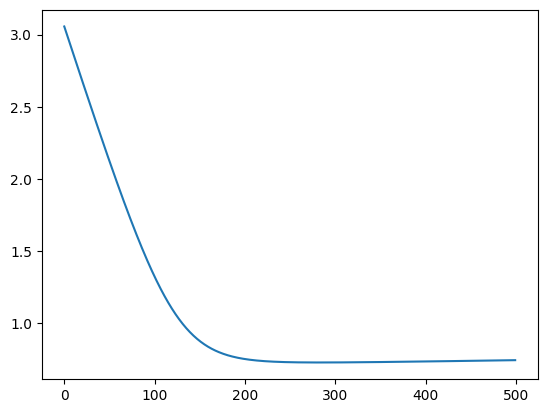

In [504]:
plt.plot(costs)